In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import datetime as dt

<AxesSubplot:title={'center':'한글폰트'}>

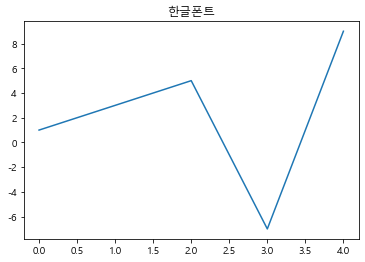

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

**Future work**
* WRITE A FUNCTION TO READ all files instead of reading one line by one line manually (hardcode)
* need to re-consider the naming of the csv file

In [3]:
df = pd.read_csv('1-5000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df1 = pd.read_csv('5000-5658.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df2 = pd.read_csv('7000-8000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df3 = pd.read_csv('8000-9000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df4 = pd.read_csv('9000-10000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df5 = pd.read_csv('10000-12000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df6 = pd.read_csv('12000-15000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df7 = pd.read_csv('15000-20000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df8 = pd.read_csv('20000-25000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df9 = pd.read_csv('30000-33000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df10 = pd.read_csv('33000-36000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df11 = pd.read_csv('36000-40000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df12 = pd.read_csv('55000-60000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df13 = pd.read_csv('60000-65000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df14 = pd.read_csv('65000-70000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df15 = pd.read_csv('70000-75000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)
df16 = pd.read_csv('80000-85000.csv', encoding='utf-16le', sep='\t', names=['url','name','json_info','review_1','review_2','review_3','review_4', 'review_5'], skiprows=1)


all_df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16], ignore_index=True)

In [4]:
# handling exception of products which their JSON info is not populated in the correct format
# also handling NULL json
def is_json(json_col):
    if json_col != json_col:
        return False
    elif json_col.strip() in ['{}']:
            return False
    else:
        try:
            check_json = json.loads(json_col)
        except:
            return False
        return True

In [5]:
def process_json(json_col):
    # convert JSON in string format to dictionary
    dict_ = json.loads(json_col)

    # drop the unnecessary keys
    for key in ['@context', '@type', 'category', 'awards', 'review']:
        dict_.pop(key, None)

    # split by ';' and combine into a list
    # product without materials (i.e. having values '[]') will be left as it is
    dict_['materials'] = ', '.join(sum([x.split(';') for x in dict_['materials']], []))

    # check if the product contains rating
    if 'aggregateRating' in dict_.keys():
        # create two new keys from 'aggregateRating' dictionary and remove this dict
        dict_['rating'] = dict_['aggregateRating']['ratingValue']
        dict_['ratingCount'] = dict_['aggregateRating']['ratingCount']
        dict_.pop('aggregateRating', None)
    else:
        dict_['rating'] = 0
        dict_['ratingCount'] = 0

    # keep only 'price'
    dict_['price'] = dict_['offers'].pop('price')
    dict_.pop('offers', None)

    return dict_

In [6]:
def main(df_main):
    # drop duplicate product
#     df_main = df_main.drop_duplicates()
    
    # create 'product ID' column based on the product link
    # kind of hard-coding
    df_main['productID'] = df_main['url'].str.replace('https://www.glowpick.com/products/', '')
    df_main['productID'] = df_main['productID'].str.replace('https://glowpick.com/products/', '')
    productID = df_main.pop('productID')
    df_main.insert(0, 'productID', productID)
    
    # fill in the NaN values as 'None' (review, json_info etc.)
#     df_main = df_main.fillna('None')
    
    # for future references/checking
    # storing products with JSON info as following: NaN / {} / wrong format
    df_miss = df_main[~df_main['json_info'].apply(is_json)].copy()
    
    df_main = df_main[df_main['json_info'].apply(is_json)]
    df_main = df_main.drop(columns=['url', 'name'])
    df_main['json_info'] = df_main['json_info'].apply(process_json)
    
    df_insert = pd.DataFrame(df_main['json_info'].tolist(), index = df_main.index)

    for i,j in enumerate(df_insert.columns):
        df_main.insert(i+1, j, df_insert[j])

    # drop the column after preprocessing
    df_main = df_main.drop(columns=['json_info'])

    # remove rows without product name
    df_main = df_main[~df_main['name'].isnull()]

    
    # fill in the NaN values as 'None' (review, json_info etc.)
    df_main = df_main.fillna('None')
    df_main = df_main.replace('', 'None')
    
    # swapping position between image url and product name
    # assuming the positions of image url and name is always next to each other
    cols = list(df_main.columns)
    image_idx = cols.index('image')
    name_idx = cols.index('name')
    cols[image_idx], cols[name_idx] = cols[name_idx], cols[image_idx]
    df_main = df_main[cols]

    df_miss = df_miss.reset_index(drop=True)
    
    # drop duplicate rows
    df_main = df_main.drop_duplicates()
    df_main = df_main.reset_index(drop=True)
    
    return df_main, df_miss

In [7]:
import time

In [8]:
%%time
all_df, noinfo_df = main(all_df)

Wall time: 1.94 s


In [14]:
all_df_airtable = all_df.drop(columns=['rating', 'ratingCount', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5']).copy()

In [10]:
all_df.head()

,productID,image,name,brand,description,materials,rating,ratingCount,price,review_1,review_2,review_3,review_4,review_5
0,4,https://dn5hzapyfrpio.cloudfront.net/home/glow...,틴트바 트리플샷,VDL,"메인컬러, 서브컬러, 베이스컬러가 단계별로 배색되어 한번의 터치만으로 그라데이션을 ...","폴리글리세릴-2트리이소스테아레이트, 폴리글리세릴-2트라이아이소스테아레이트, 디이소스...",3.31,129,15000,gelab ...,벤지누나 ...,궁쉬궁쉬 ...,아민 ...,cclip ...
1,5,https://dn5hzapyfrpio.cloudfront.net/home/glow...,틴트바 밀크콜라다,VDL,"그물망 형태의 겔링 시스템과 모이스춰 랩핑 시스템으로 보습막 형성을 하여, 틴트로 ...",None,4.00,4,8000,비으닝 ...,설라엘 ...,갱밍z ...,김수육 ...,None
2,6,https://dn5hzapyfrpio.cloudfront.net/home/glow...,틴트바 젤티니,VDL,고수분 컬러입자가 입술을 선명하게 물들이며 오랜시간 지속시켜주는 산뜻한 워터젤 립 ...,"정제수, 글리세린, 부틸렌글라이콜, 피이지-50하이드로제네이티드캐스터오일, 트로메타...",3.13,99,7000,yunna ...,매초롬 ...,유니나농 ...,1ㅅ1 ...,해준 ...
3,7,https://dn5hzapyfrpio.cloudfront.net/home/glow...,겔랑 루즈 G 드 세리 느와르 쥬얼 립스틱 컴팩트,겔랑,하나의 쥬얼 액세서리와 같은 감각적인 패키지의 루즈 G는 고급 천연 루비 파우더로 ...,None,4.00,28,56000,deedee ...,minlove ...,goomm ...,눈꽃가로수길 ...,초롱초롱아 ...
4,8,https://dn5hzapyfrpio.cloudfront.net/home/glow...,루즈 오토마띠끄,겔랑,특수 왁스 성분으로 부드럽게 발리며 빛 반사효과와 롱라스팅 효과가 뛰어난 립스팁입니...,None,4.17,35,45000,발그레홍조 ...,부화아아앙 ...,가을하늘햇살 ...,LlUuNnAa ...,썸머8 ...


In [ ]:
noinfo_df.tail()

In [9]:
# this is to count average white spaces in between first word and second word
# this piece of info to be used for regex later
for i in range(1,6):
    i = str(i)
    col = 'review_'+i
    num_ws = []
    for rw in all_df[col]:
        if rw != 'None':
            firstw = rw.split()[0]
            secondw = rw.split()[1]
            ws = rw.split(firstw)[1].split(secondw)[0]
            num_ws.append(len(ws))
    print("Average number of whitespaces of", col, ":", sum(num_ws) / len(num_ws))

Average number of whitespaces of review_1 : 32.98922169276152
Average number of whitespaces of review_2 : 32.991558731576596
Average number of whitespaces of review_3 : 32.99224059235217
Average number of whitespaces of review_4 : 32.99107543780871
Average number of whitespaces of review_5 : 32.992391965916006


### Export to CSV

In [23]:
all_df_airtable[:4000].to_csv('Processed_Products_Airtable.csv', index=False, encoding='utf-8-sig')

In [25]:
all_df_airtable.sample(4000).to_csv('Processed_Products_Airtable.csv', index=False, encoding='utf-8-sig')

In [11]:
pd.read_csv('Processed_Products.csv')

,productID,image,name,brand,description,materials,rating,ratingCount,price,review_1,review_2,review_3,review_4,review_5
0,4,https://dn5hzapyfrpio.cloudfront.net/home/glow...,틴트바 트리플샷,VDL,"메인컬러, 서브컬러, 베이스컬러가 단계별로 배색되어 한번의 터치만으로 그라데이션을 ...","폴리글리세릴-2트리이소스테아레이트, 폴리글리세릴-2트라이아이소스테아레이트, 디이소스...",3.31,129,15000,gelab ...,벤지누나 ...,궁쉬궁쉬 ...,아민 ...,cclip ...
1,5,https://dn5hzapyfrpio.cloudfront.net/home/glow...,틴트바 밀크콜라다,VDL,"그물망 형태의 겔링 시스템과 모이스춰 랩핑 시스템으로 보습막 형성을 하여, 틴트로 ...",None,4.00,4,8000,비으닝 ...,설라엘 ...,갱밍z ...,김수육 ...,None
2,6,https://dn5hzapyfrpio.cloudfront.net/home/glow...,틴트바 젤티니,VDL,고수분 컬러입자가 입술을 선명하게 물들이며 오랜시간 지속시켜주는 산뜻한 워터젤 립 ...,"정제수, 글리세린, 부틸렌글라이콜, 피이지-50하이드로제네이티드캐스터오일, 트로메타...",3.13,99,7000,yunna ...,매초롬 ...,유니나농 ...,1ㅅ1 ...,해준 ...
3,7,https://dn5hzapyfrpio.cloudfront.net/home/glow...,겔랑 루즈 G 드 세리 느와르 쥬얼 립스틱 컴팩트,겔랑,하나의 쥬얼 액세서리와 같은 감각적인 패키지의 루즈 G는 고급 천연 루비 파우더로 ...,None,4.00,28,56000,deedee ...,minlove ...,goomm ...,눈꽃가로수길 ...,초롱초롱아 ...
4,8,https://dn5hzapyfrpio.cloudfront.net/home/glow...,루즈 오토마띠끄,겔랑,특수 왁스 성분으로 부드럽게 발리며 빛 반사효과와 롱라스팅 효과가 뛰어난 립스팁입니...,None,4.17,35,45000,발그레홍조 ...,부화아아앙 ...,가을하늘햇살 ...,LlUuNnAa ...,썸머8 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,84996,https://dn5hzapyfrpio.cloudfront.net/home/glow...,뚜또베네 갈락토미세스 올인원 에센스,레오 티지아노,갈락토미세스 발효 여과물이 92.7% 함유된 스킨타입의 산뜻한 에센스\r\n\r\n...,"갈락토미세스발효여과물, 알코올, 에탄올, 나이아신아마이드, 글리세레스-25피씨에이이...",0.00,0,29800,None,None,None,None,None
36365,84997,https://dn5hzapyfrpio.cloudfront.net/home/glow...,뚜또베네 마일드 모이스처 클렌징 폼,레오 티지아노,부드러운 거품이 모공 속까지 개운하게 클렌징\r\n\r\n-베이스 메이크업까지 완벽...,None,0.00,0,16000,None,None,None,None,None
36366,84998,https://dn5hzapyfrpio.cloudfront.net/home/glow...,뚜또베네 실크 터치 선크림 [SPF50+/PA+++],레오 티지아노,"강력한 자외선 차단효과와 미백, 주름개선 3중 기능성 남성 선크림\n\n- 번들거림...","정제수, 사이클로펜타실록산, 사이클로펜타실록세인, 에칠헥실메톡시신나메이트, 에틸헥실...",0.00,0,2800,None,None,None,None,None
36367,84999,https://dn5hzapyfrpio.cloudfront.net/home/glow...,부스터 리페어,클라랑스,일상에 활기를 더해주는 생기 넘치는 피부!\r\n햇볕에 타거나 추위에 노출되어 약해...,"글리세린, 정제수, 디프로필렌글라이콜, 다이프로필렌글라이콜, 판테놀, 미모사 테누이...",4.00,2,52000,현지닷뿡쀼 ...,almighty ...,None,None,None


### Data preprocessing of review contents

**Future work:**
* If were to store these information in DB, then will need to create a associative entity table (bridge between product info table and review table) for determining if there exists review for the products.
* Create a unique review ID for review table

In [91]:
def change_date(date):
    mth = dt.datetime.today().strftime('%m')
    year = dt.datetime.today().strftime('%Y')
    day = dt.datetime.today().strftime('%d')
    if '일전' in date:
        num_day = date[0]
        if int(day) > int(num_day):
            date = dt.datetime(year=int(year), month=int(mth), day=1).strftime('%Y.%m.%d')
        else:
            date = dt.datetime(year=int(year), month=int(mth)-1, day=1).strftime('%Y.%m.%d')
    elif '개월전' in date:
        num_mth = date[0]
        if int(mth) > int(num_mth):
            new_mth = int(mth) - int(num_mth)
            date = dt.datetime(year=int(year), month=new_mth, day=1).strftime('%Y.%m.%d')
        else:
            new_mth = 12 - (int(mth) - int(num_mth))
            date = dt.datetime(year=int(year), month=new_mth, day=1).strftime('%Y.%m.%d')
    elif any(x in ['분', '초', '시'] for x in date):
        date = dt.datetime.today().strftime('%Y.%m.%d')
    else:
        date
        
    return date

In [92]:
def process_review(df):
    review_df = df[['productID', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5']].copy()
    review_df = review_df.melt(id_vars='productID', var_name='reviewID', value_name='details')
    
    review_df['productID'] = review_df['productID'].astype(int)
    review_df = review_df.sort_values(['productID', 'reviewID'])
    review_df['productID'] = review_df['productID'].astype(str) # keep productID in string form to save database space
    
    # composite key? product ID+review ID
    review_df['reviewID'] = review_df['reviewID'].str.replace('review_','')

    # strip the leading and trailing white spaces for review
    review_df['details'] = review_df['details'].str.strip()
            
    # filter out rows without review
    review_df = review_df[review_df['details']!='None']
    
    # filter out the reviews which do not contain meaningful words/characters
    review_df = review_df[review_df['details'].apply(lambda x: bool(re.search(r"[a-zA-Z가-힣]+", x)))]
    
    # skip this block, original draft - has to change because some info is not available and user ID could contain space
    '''
    # split first then combine the review contents together again later
    review_df['details'] = review_df['details'].str.split()

    # join the review contents back
    review_df['contents'] = review_df['details'].apply(lambda x: ' '.join(x[6:]))
    
    new_cols = ['userID', 'age', 'skinType', 'gender', 'rating', 'date']
    for i,j in zip(new_cols, range(6)):
        review_df[i] = review_df['details'].map(lambda x: x[j])
    
    review_df['age'] = review_df['age'].str.replace('세', '')
    '''
    
    new_cols = ['userID', 'age', 'skinType', 'gender', 'rating', 'date', 'contents']
    review_df[new_cols] = review_df['details'].str.extract(r'(.{0,30})?(\s+\d+세)?(\s+[가-힣]+성)?(\s+[여남])?(\s+\d)?(\s+[0-9.초분시간일개월전]+)?(\s*.*)?')
    
    # replace by 'None' for unavailable/NaN information
    review_df = review_df.fillna('None')
    
    # strip the leading and trailing white spaces for all columns
    review_df = review_df.transform(lambda x: x.str.strip())
    
    # review date
    review_df['date'] = review_df['date'].apply(change_date)
    
    # replace 'None' by '0'
    # remove '세' and convert into integer type for data analysis later
    review_df['age'] = review_df['age'].str.replace('None', '0').str.replace('세', '')
    review_df['age'] = review_df['age'].astype(int)
    
    # convert into integer type for data analysis later
    review_df['rating'] = review_df['rating'].astype(int)
    
    review_df = review_df.drop(columns='details')
    
    review_df = review_df.reset_index(drop=True)
    
    return review_df

In [93]:
%%time
review_df = process_review(all_df)

Wall time: 2.79 s


* check if the review_df is processed properly

In [95]:
review_df.head()

,productID,reviewID,userID,age,skinType,gender,rating,date,contents
0,4,1,gelab,25,건성,여,5,2020.12.10,고등학생때 신기하게 생겨서 사봤는데 예상치못하게 인생립이 된 립스틱이예요! 세가지 ...
1,4,2,벤지누나,33,복합성,여,5,2016.11.12,이거진짜인생템 네개사서 파우치에하나 화장대에하나 직장유니폼주머니에하나 나머지하나는어...
2,4,3,궁쉬궁쉬,33,복합성,여,5,2016.10.04,풀립이 안어울려서 항상 그라 인생인데이거 진짜 편함 특히 바쁜 아침에!그냥 대충 슥...
3,4,4,아민,29,건성,여,5,2016.05.26,그라 립 원조!! 3가지색 그라데이션이라 정말이쁨 0
4,4,5,cclip,34,중성,여,5,2016.03.22,이거정말좋음!!거울보고입술바르지못하는상황일때 급하게혈색주기딱임가지고다니면서 수시로바...


In [94]:
# length of date
review_df['date'].str.len().unique()

array([10], dtype=int64)

In [98]:
review_df['rating'].unique()

array([5, 4, 3, 2, 1])

In [99]:
review_df['gender'].unique()

array(['여', '남'], dtype=object)

In [100]:
review_df['skinType'].unique()

array(['건성', '복합성', '중성', '지성', '민감성'], dtype=object)

In [101]:
review_df['age'].unique()
# can see that there is some weird ages keyed in by the users, needs further analysis in EDA

array([  25,   33,   29,   34,   21,   19,   24,   26,   30,   28,   45,
         49,   41,   23,   39,   31,   36,   32,   27,   40,   43,   17,
         15,   22,   35,   37,   44,   42,   20,   50,   46,   18,   38,
         55,   48,   61,   52,   51,   54,   56,    4,   53,  122,   47,
         16,    5,   57,    7,   58,   59,   12,    8,  103,   65,  105,
        104,   10,   60,  106,   14,  102,   90,   62,   72,   63, 1996,
          3,    0])

### Export to CSV

In [ ]:
review_df.to_csv('Processed_Review.csv', index=False, encoding='utf-8-sig')

In [ ]:
pd.read_csv('Processed_Review.csv')